In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import time
import csv

In [66]:
#数据导入
header = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
data = pd.read_csv(r"Data\letter-recognition.data",names=header)
#choose a pair of  H and K, 数据集中 0-733是H class 72，后面是K class 75 
dataset_H = data.loc[data[0] == "H"]
dataset_H = dataset_H.replace("H", ord("H")) 
dataset_K = data.loc[data[0] == "K"]
dataset_K = dataset_K.replace("K", ord("K")) 
dataset_H_and_K = dataset_H.append(dataset_K, ignore_index=True)
#M and Y, dataset_M_and_Y 0-791 是M class77， 后面的是Y class 89
dataset_M = data.loc[data[0] == "M"]
dataset_M = dataset_M.replace("M", ord("M")) 
dataset_Y = data.loc[data[0] == "Y"]
dataset_Y = dataset_Y.replace("Y", ord("Y")) 
dataset_M_and_Y = dataset_M.append(dataset_Y, ignore_index=True )
#L and Z, 总集合中 0-760是L class 76，后面的是Z class 90
dataset_L = data.loc[data[0] == "L"]
dataset_L = dataset_L.replace("L", ord("L")) 
dataset_Z = data.loc[data[0] == "Z"]
dataset_Z = dataset_Z.replace("Z", ord("Z")) 
dataset_L_and_Z = dataset_L.append(dataset_Z, ignore_index=True )

#split three dataset into train and test

#pair of H and K
X_H_and_K = np.array(dataset_H_and_K.drop(0, axis=1))
Y_H_and_K = np.array(dataset_H_and_K[0])
#pair of M and Y
X_M_and_Y = np.array(dataset_M_and_Y.drop(0, axis=1))
Y_M_and_Y = np.array(dataset_M_and_Y[0])
#pair of L and Z
X_L_and_Z = np.array(dataset_L_and_Z.drop(0, axis=1))
Y_L_and_Z = np.array(dataset_L_and_Z[0])

#Set training and testing set for each pair, after reshape they will become one row
#pair of H and K
X_H_and_K_train, X_H_and_K_value, Y_H_and_K_train, Y_H_and_K_value = train_test_split(X_H_and_K, Y_H_and_K , test_size=0.1, random_state=42) #42
Y_H_and_K_train_reshaped = Y_H_and_K_train.reshape(-1, 1)
Y_H_and_K_value_reshaped = Y_H_and_K_value.reshape(-1, 1)
#pair of M and Y
X_M_and_Y_train, X_M_and_Y_value, Y_M_and_Y_train, Y_M_and_Y_value = train_test_split(X_M_and_Y, Y_M_and_Y, test_size=0.1, random_state=42) #42
Y_M_and_Y_train_reshaped = Y_M_and_Y_train.reshape(-1, 1)
Y_M_and_Y_value_reshaped = Y_M_and_Y_value.reshape(-1, 1)
#pair of M and Y
X_L_and_Z_train, X_L_and_Z_value, Y_L_and_Z_train, Y_L_and_Z_value = train_test_split(X_L_and_Z, Y_L_and_Z, test_size=0.1, random_state=42) #42
Y_L_and_Z_train_reshaped = Y_L_and_Z_train.reshape(-1, 1)
Y_L_and_Z_value_reshaped = Y_L_and_Z_value.reshape(-1, 1)


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def prePCA(X_train, X_test):
    sc = StandardScaler()
    X_train_standard = sc.fit_transform(X_train)
    X_test_standard = sc.transform(X_test)
    cov_mat = np.cov(X_train.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
    cum_var_exp = np.cumsum(var_exp)
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(reverse=True)
    w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],
                eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis]
                ))
    X_train_standard[0].dot(w)
    X_test_standard[0].dot(w)
    pca=PCA(n_components=4)
    X_train_PCA = pca.fit_transform(X_train_standard)
    X_test_PCA = pca.transform(X_test_standard)
    print(X_train_PCA.shape)
    return X_train_PCA, X_test_PCA

X_H_and_K_train, X_H_and_K_test =prePCA(X_H_and_K_train, X_H_and_K_value)

X_M_and_Y_train, X_M_and_Y_test = prePCA(X_M_and_Y_train, X_M_and_Y_value)

X_L_and_Z_train, X_L_and_Z_test =  prePCA(X_L_and_Z_train, X_L_and_Z_value)

(1325, 4)
(1420, 4)
(1345, 4)


In [68]:
# for check the accuracy for each model
def calculateAccuracy(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    #This is a binary question, so rather than accuracy_score( y_test, y_pred)
    result = np.mean(Y_pred == Y_test)
    return result

#for Cross validation
crossValidationFold = 5
#It's a dict for store the best hyperparameter
best_models_H_and_K = []
best_models_L_and_Z = []
best_models_M_and_Y = []

Epoch 1/10
34/34 [==============================] - 0s 627us/step - loss: 0.7068 - accuracy: 0.5019
Epoch 2/10
34/34 [==============================] - 0s 850us/step - loss: 0.7006 - accuracy: 0.5028
Epoch 3/10
34/34 [==============================] - 0s 622us/step - loss: 0.6976 - accuracy: 0.4906
Epoch 4/10
34/34 [==============================] - 0s 558us/step - loss: 0.6958 - accuracy: 0.4726
Epoch 5/10
34/34 [==============================] - 0s 637us/step - loss: 0.6946 - accuracy: 0.4623
Epoch 6/10
34/34 [==============================] - 0s 674us/step - loss: 0.6936 - accuracy: 0.4849
Epoch 7/10
34/34 [==============================] - 0s 586us/step - loss: 0.6928 - accuracy: 0.5038
Epoch 8/10
34/34 [==============================] - 0s 616us/step - loss: 0.6921 - accuracy: 0.5085
Epoch 9/10
34/34 [==============================] - 0s 645us/step - loss: 0.6910 - accuracy: 0.5311
Epoch 10/10
9/9 [==============================] - 0s 886us/step - loss: 0.6918 - accuracy: 0.5396
E

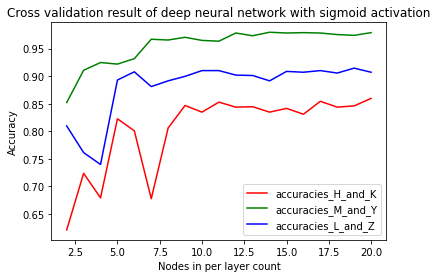

best node count per layer value for NN  with sigmoid is 20 with mean accuracy0.8596226572990417
best node count per layer value for NN  with sigmoid is 14 with mean accuracy0.9795774698257447
best node count per layer value for NN  with sigmoid is 19 with mean accuracy0.9144981384277344


<Figure size 432x288 with 0 Axes>

In [69]:
Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))

Y_H_and_K_value_oneHot = np.array(pd.get_dummies(Y_H_and_K_value))
Y_M_and_Y_value_oneHot = np.array(pd.get_dummies(Y_M_and_Y_value))
Y_L_and_Z_value_oneHot = np.array(pd.get_dummies(Y_L_and_Z_value))


node_per_layer_H_and_K = np.arange(2,21,1)
node_per_layer_M_and_Y = np.arange(2,21,1)
node_per_layer_L_and_Z = np.arange(2,21,1)

accuracies_H_and_K = np.zeros(len(node_per_layer_H_and_K))
accuracies_M_and_Y = np.zeros(len(node_per_layer_M_and_Y))
accuracies_L_and_Z = np.zeros(len(node_per_layer_L_and_Z))

def NNSigmoid(node_per_layer, accuracies, X_pair_train, Y_pair_train_oneHot):
    for i, input in enumerate(node_per_layer):
        kf = KFold(n_splits = crossValidationFold)
        mean_accuracy = 0
        for train_index, test_index in kf.split(X_pair_train):
            model = keras.Sequential(name="sigmoid_model")
            model.add(layers.Dense(input, activation="sigmoid"))
            model.add(layers.Dense(2, activation="softmax"))
            model.compile(optimizer='adam', loss='categorical_crossentropy'
            , metrics=['accuracy'])
            
            X_train_fold, X_test_fold = X_pair_train[train_index], X_pair_train[test_index]
            Y_train_fold, Y_test_fold = Y_pair_train_oneHot[train_index], Y_pair_train_oneHot[test_index]
            model.fit(X_train_fold, Y_train_fold, epochs = 10) 
            
            _, val_acc = model.evaluate(X_test_fold, Y_test_fold)
            mean_accuracy += val_acc
        mean_accuracy /= crossValidationFold
        accuracies[i] = mean_accuracy

def plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z):
    # Plot accuracy
    plt.plot(node_per_layer_H_and_K, accuracies_H_and_K, color = 'r', label = "accuracies_H_and_K")
    plt.plot(node_per_layer_M_and_Y, accuracies_M_and_Y, color = 'g', label = "accuracies_M_and_Y")
    plt.plot(node_per_layer_L_and_Z, accuracies_L_and_Z, color = 'b', label = "accuracies_L_and_Z")
    plt.xlabel('Nodes in per layer count')
    plt.ylabel('Accuracy')
    plt.title('Cross validation result of deep neural network with sigmoid activation')
    plt.legend()
    plt.show()
    plt.clf()

def find_best_hyperparameter(accuracies, best_models, node_per_layer):
    best_node = node_per_layer[np.argmax(accuracies)]
    print('best node count per layer value for NN  with sigmoid is {} with mean accuracy{}'
    .format(best_node, max(accuracies)))
    best_models.append({
        'name': 'dimension reduction Model with sigmoid activation function',
        'best_node': best_node,
    })
    return best_node



NNSigmoid(node_per_layer_H_and_K, accuracies_H_and_K, X_H_and_K_train, Y_H_and_K_train_oneHot)
NNSigmoid(node_per_layer_M_and_Y, accuracies_M_and_Y , X_M_and_Y_train, Y_M_and_Y_train_oneHot)
NNSigmoid(node_per_layer_L_and_Z, accuracies_L_and_Z , X_L_and_Z_train, Y_L_and_Z_train_oneHot)
#plot
plot(node_per_layer_H_and_K, node_per_layer_M_and_Y, node_per_layer_L_and_Z,
accuracies_H_and_K, accuracies_M_and_Y, accuracies_L_and_Z)
#save the best hyperparameter
best_node_HK = find_best_hyperparameter(accuracies_H_and_K, best_models_H_and_K, node_per_layer_H_and_K)
best_node_MY = find_best_hyperparameter(accuracies_M_and_Y, best_models_M_and_Y, node_per_layer_M_and_Y)
best_node_LZ = find_best_hyperparameter(accuracies_L_and_Z, best_models_L_and_Z, node_per_layer_L_and_Z)

In [70]:
# sigmoid
sigmoid_model_HK = keras.Sequential(name="sigmoid_model_HK")
sigmoid_model_HK.add(layers.Dense(best_node_HK, activation="sigmoid"))
sigmoid_model_HK.add(layers.Dense(2, activation="softmax"))
sigmoid_model_HK.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

sigmoid_model_MY = keras.Sequential(name="sigmoid_model_MY")
sigmoid_model_MY.add(layers.Dense(best_node_MY, activation="sigmoid"))
sigmoid_model_MY.add(layers.Dense(2, activation="softmax"))
sigmoid_model_MY.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

sigmoid_model_LZ = keras.Sequential(name="sigmoid_model_LZ")
sigmoid_model_LZ.add(layers.Dense(best_node_LZ, activation="sigmoid"))
sigmoid_model_LZ.add(layers.Dense(2, activation="softmax"))
sigmoid_model_LZ.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


best_NN_model_HK = [
    {
        'model': sigmoid_model_HK,
        'name': 'NN with Sigmoid activation after PCA',
    }
]

best_NN_model_MY = [
    {
        'model': sigmoid_model_MY,
        'name': 'NN with Sigmoid activation after PCA',
    }
]


best_NN_model_LZ = [
    {
        'model': sigmoid_model_LZ,
        'name': 'NN with Sigmoid activation after PCA',
    }
]



Y_H_and_K_train_oneHot = np.array(pd.get_dummies(Y_H_and_K_train))
Y_M_and_Y_train_oneHot = np.array(pd.get_dummies(Y_M_and_Y_train))
Y_L_and_Z_train_oneHot = np.array(pd.get_dummies(Y_L_and_Z_train))

Y_H_and_K_value_oneHot = np.array(pd.get_dummies(Y_H_and_K_value))
Y_M_and_Y_value_oneHot = np.array(pd.get_dummies(Y_M_and_Y_value))
Y_L_and_Z_value_oneHot = np.array(pd.get_dummies(Y_L_and_Z_value))


def testDataset_NN(result_test_set, best_NN_model ,X_train, Y_train_oneHot, X_test, Y_test_oneHot):
    for modelInformation in best_NN_model:
        model = modelInformation['model']
        start_training = time.time()
        model.fit(X_train, Y_train_oneHot, epochs=20)
        stop_training = time.time()  - start_training 
        start_testing = time.time()
        _, validation_accuracy = model.evaluate(X_test, Y_test_oneHot, verbose=2)
        stop_testing = time.time() - start_testing
        result_test_set.append({
            'name': modelInformation['name'],
            'model training time' : stop_training * 1000,
            'model operation time': stop_testing * 1000,
            'validation_accuracy': validation_accuracy,
        })
result_test_set_HK = []
result_test_set_MY = []
result_test_set_LZ = []


testDataset_NN(result_test_set_HK , best_NN_model_HK ,X_H_and_K_train, Y_H_and_K_train_oneHot, X_H_and_K_test, Y_H_and_K_value_oneHot)
testDataset_NN(result_test_set_MY, best_NN_model_MY ,X_M_and_Y_train, Y_M_and_Y_train_oneHot, X_M_and_Y_test, Y_M_and_Y_value_oneHot)
testDataset_NN(result_test_set_LZ, best_NN_model_LZ ,X_L_and_Z_train, Y_L_and_Z_train_oneHot, X_L_and_Z_test, Y_L_and_Z_value_oneHot)

Epoch 1/20
42/42 [==============================] - 0s 902us/step - loss: 0.6103 - accuracy: 0.7019
Epoch 2/20
42/42 [==============================] - 0s 903us/step - loss: 0.5608 - accuracy: 0.8226
Epoch 3/20
42/42 [==============================] - 0s 783us/step - loss: 0.5235 - accuracy: 0.8521
Epoch 4/20
42/42 [==============================] - 0s 627us/step - loss: 0.4898 - accuracy: 0.8438
Epoch 5/20
42/42 [==============================] - 0s 664us/step - loss: 0.4602 - accuracy: 0.8596
Epoch 6/20
42/42 [==============================] - 0s 688us/step - loss: 0.4354 - accuracy: 0.8581
Epoch 7/20
42/42 [==============================] - 0s 749us/step - loss: 0.4148 - accuracy: 0.8581
Epoch 8/20
42/42 [==============================] - 0s 688us/step - loss: 0.3987 - accuracy: 0.8581
Epoch 9/20
42/42 [==============================] - 0s 687us/step - loss: 0.3851 - accuracy: 0.8626
Epoch 10/20
42/42 [==============================] - 0s 664us/step - loss: 0.3744 - accuracy: 0.8634

In [71]:
def testDataset_NN(result_test_set, best_NN_model ,X_train, Y_train_oneHot, X_test, Y_test_oneHot):
    for model in best_NN_model:
        model = model['model']
        start_training = time.time()
        model.fit(X_train, Y_train_oneHot, epochs=30)
        stop_training = time.time()  - start_training 
        start_testing = time.time()
        _, validation_accuracy = model.evaluate(X_test, Y_test_oneHot, verbose=2)
        stop_testing = time.time() - start_testing
        result_test_set.append({
            'name': model.name,
            'model training time' : stop_training * 1000,
            'model operation time': stop_testing * 1000,
            'validation_accuracy': validation_accuracy,
        })

testDataset_NN(result_test_set_HK , best_NN_model_HK ,X_H_and_K_train, Y_H_and_K_train_oneHot, X_H_and_K_test, Y_H_and_K_value_oneHot)
testDataset_NN(result_test_set_MY, best_NN_model_MY ,X_M_and_Y_train, Y_M_and_Y_train_oneHot, X_M_and_Y_test, Y_M_and_Y_value_oneHot)
testDataset_NN(result_test_set_LZ, best_NN_model_LZ ,X_L_and_Z_train, Y_L_and_Z_train_oneHot, X_L_and_Z_test, Y_L_and_Z_value_oneHot)



Epoch 1/30
42/42 [==============================] - 0s 808us/step - loss: 0.3369 - accuracy: 0.8657
Epoch 2/30
42/42 [==============================] - 0s 688us/step - loss: 0.3362 - accuracy: 0.8679
Epoch 3/30
42/42 [==============================] - 0s 688us/step - loss: 0.3357 - accuracy: 0.8664
Epoch 4/30
42/42 [==============================] - 0s 641us/step - loss: 0.3346 - accuracy: 0.8649
Epoch 5/30
42/42 [==============================] - 0s 570us/step - loss: 0.3338 - accuracy: 0.8657
Epoch 6/30
42/42 [==============================] - 0s 593us/step - loss: 0.3337 - accuracy: 0.8657
Epoch 7/30
42/42 [==============================] - 0s 664us/step - loss: 0.3327 - accuracy: 0.8664
Epoch 8/30
42/42 [==============================] - 0s 592us/step - loss: 0.3322 - accuracy: 0.8657
Epoch 9/30
42/42 [==============================] - 0s 593us/step - loss: 0.3316 - accuracy: 0.8657
Epoch 10/30
42/42 [==============================] - 0s 689us/step - loss: 0.3308 - accuracy: 0.8679

In [72]:
def makeFile(result_test_set_HK, result_test_set_MY, result_test_set_LZ):
    df_HK = pd.DataFrame.from_dict(result_test_set_HK) 
    df_MY = pd.DataFrame.from_dict(result_test_set_MY) 
    df_LZ = pd.DataFrame.from_dict(result_test_set_LZ) 
    df_HK.to_csv (r'Result of test set HK after PCA .csv', index = False, header=True)
    df_MY.to_csv (r'Result of test set MY after PCA.csv', index = False, header=True)
    df_LZ.to_csv (r'Result of test set LZ after PCA.csv', index = False, header=True)    

makeFile(result_test_set_HK, result_test_set_MY, result_test_set_LZ)